# Structural Estimation: Analysis of Monte Carlo Results

In [1]:
using Pkg
Pkg.activate(".")
#for pkg in ["BlackBoxOptim", "Cubature", "Distributions", "Integrals", "Roots", "JLD", "PythonPlot"]
#    Pkg.add(pkg)
#end

Pkg.instantiate()

using Base.Threads, BlackBoxOptim, Cubature, Distributions, Integrals, Random, Roots, JLD, PythonPlot

  Activating project at `C:\Users\jbrig\Documents\research\mapinator_2024\notes\estimation_of_tau`
    CondaPkg Found dependencies: C:\Users\jbrig\.julia\packages\PythonCall\Nr75f\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\jbrig\.julia\packages\PythonPlot\469aA\CondaPkg.toml
    CondaPkg Dependencies already up to date


In [2]:
res = load("monte_carlo_structure_results_collapse_sinks_1000_new.jld")

Dict{String, Any} with 13 entries:
  "estimations_per_round" => 5
  "k"                     => 4
  "stage_2_estimates"     => [3.86719 0.424796 … 0.173191 0.977766; 3.52125 0.3…
  "max_evals_stage_1"     => 1000000
  "stage_2_fitness"       => [32821.7, 32951.3, 32885.8, 32837.8, 32903.8, 3292…
  "counter"               => [100002, 100002, 100002, 100002, 100002, 100002, 1…
  "placements"            => [378 462 … 349 525; 364 454 … 381 531; … ; 352 444…
  "unmatched"             => [144 414 908 631; 145 355 903 638; … ; 152 385 880…
  "bootstrap_rounds"      => 1000
  "K"                     => 7
  "max_evals_stage_2"     => 100000
  "stage_1_estimates"     => [0.474784 0.562147 0.733499 0.559487; 0.557499 0.4…
  "stage_1_fitness"       => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 …

In [3]:
k = res["k"]
K = res["K"]

7

In [4]:
valid_indices = 1:res["bootstrap_rounds"]

1:1000

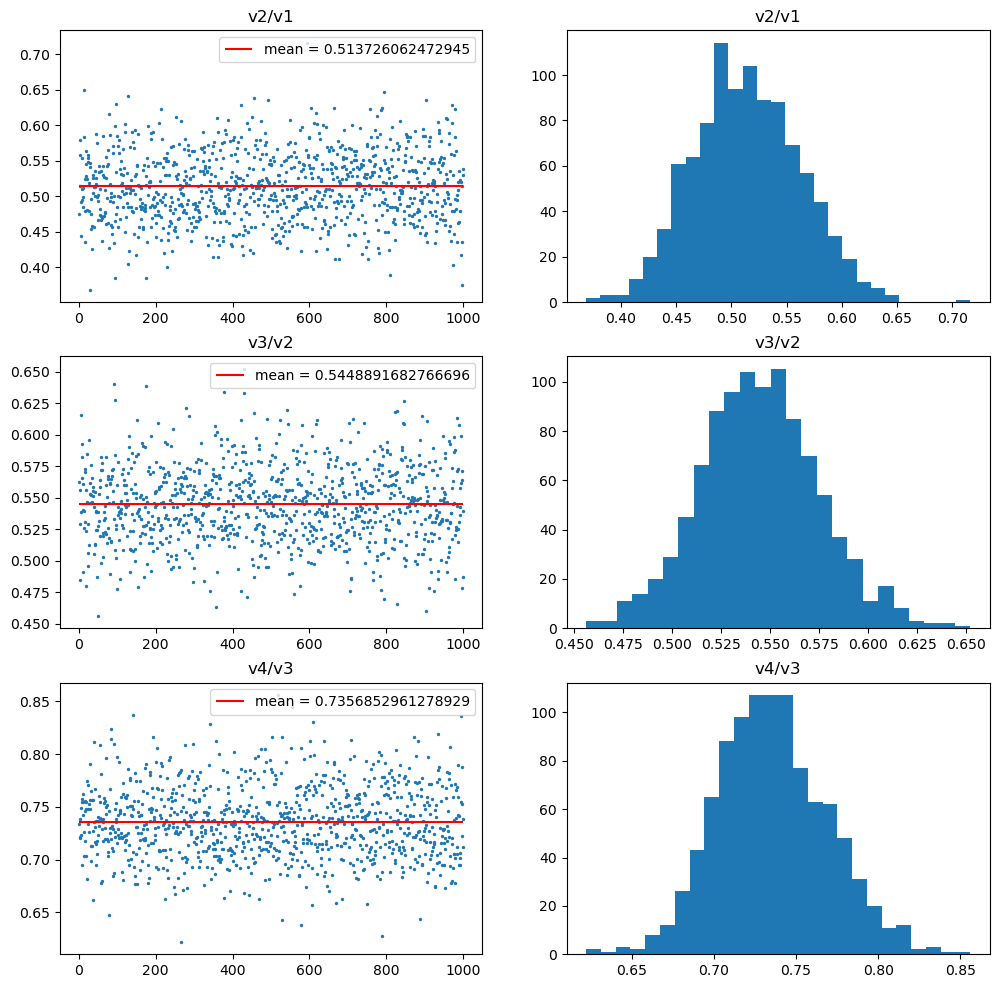

In [5]:
num_plots = 3
subplots(figsize = (6 * 2, 4 * num_plots))
clf()
subplot(3, 2, 1)
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, 1] for i in valid_indices], s = 2)
v2v1_mean = mean([res["stage_1_estimates"][i, 1] for i in valid_indices])
hlines(v2v1_mean, 0, length(valid_indices), label = "mean = $v2v1_mean", colors = "red")
title("v2/v1")
legend()

subplot(3, 2, 2)
hist([res["stage_1_estimates"][i, 1] for i in valid_indices], bins = "auto")
title("v2/v1")


subplot(3, 2, 3)
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, 2] for i in valid_indices], s = 2)
v3v2_mean = mean([res["stage_1_estimates"][i, 2] for i in valid_indices])
hlines(v3v2_mean, 0, length(valid_indices), label = "mean = $v3v2_mean", colors = "red")
title("v3/v2")
legend()

subplot(3, 2, 4)
hist([res["stage_1_estimates"][i, 2] for i in valid_indices], bins = "auto")
title("v3/v2")


subplot(3, 2, 5)
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, 3] for i in valid_indices], s = 2)
v4v3_mean = mean([res["stage_1_estimates"][i, 3] for i in valid_indices])
hlines(v4v3_mean, 0, length(valid_indices), label = "mean = $v4v3_mean", colors = "red")
title("v4/v3")
legend()

subplot(3, 2, 6)
hist([res["stage_1_estimates"][i, 3] for i in valid_indices], bins = "auto")
title("v4/v3")

savefig("value_ratios.png")
;

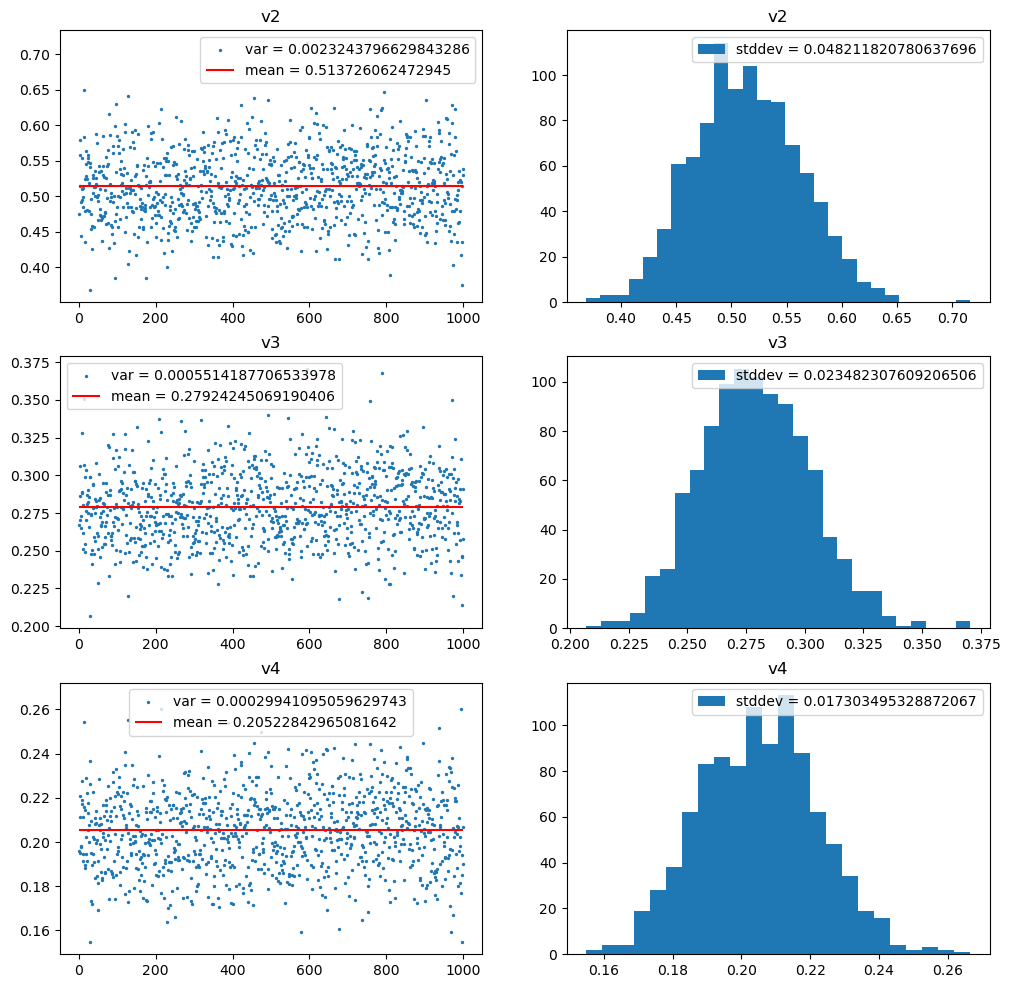

In [6]:
num_plots = 3
subplots(figsize = (6 * 2, 4 * num_plots))
clf()
subplot(3, 2, 1)
v2_estimates = [res["stage_1_estimates"][i, 1] for i in valid_indices]
scatter(1:length(valid_indices), v2_estimates, s = 2, label = "var = $(var(v2_estimates))")
v2_mean = mean(v2_estimates)
hlines(v2_mean, 0, length(valid_indices), label = "mean = $v2_mean", colors = "red")
title("v2")
legend()

subplot(3, 2, 2)
hist(v2_estimates, bins = "auto", label = "stddev = $(std(v2_estimates))")
title("v2")
legend()

v3_estimates = [res["stage_1_estimates"][i, 2] * v2_estimates[i] for i in valid_indices]

subplot(3, 2, 3)
scatter(1:length(valid_indices), v3_estimates, s = 2, label = "var = $(var(v3_estimates))")
v3_mean = mean(v3_estimates)
hlines(v3_mean, 0, length(valid_indices), label = "mean = $v3_mean", colors = "red")
title("v3")
legend()

subplot(3, 2, 4)
hist(v3_estimates, bins = "auto", label = "stddev = $(std(v3_estimates))")
title("v3")
legend()

v4_estimates = [res["stage_1_estimates"][i, 3] * v3_estimates[i] for i in valid_indices]

subplot(3, 2, 5)
scatter(1:length(valid_indices), v4_estimates, s = 2, label = "var = $(var(v4_estimates))")
v4_mean = mean(v4_estimates)
hlines(v4_mean, 0, length(valid_indices), label = "mean = $v4_mean", colors = "red")
title("v4")
legend()

subplot(3, 2, 6)
hist(v4_estimates, bins = "auto", label = "stddev = $(std(v4_estimates))")
title("v4")
legend()

savefig("values.png")
;

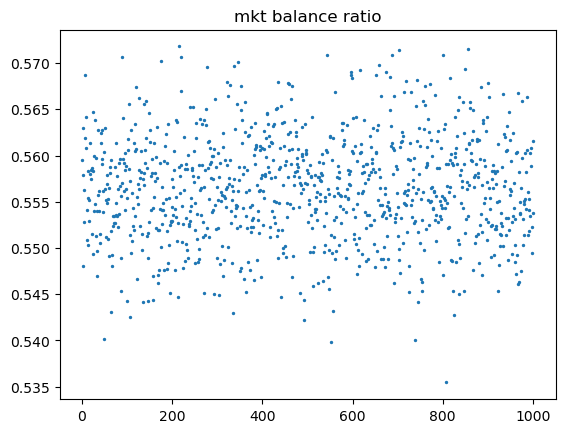

In [7]:
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, k] for i in valid_indices], s = 2)
title("mkt balance ratio");

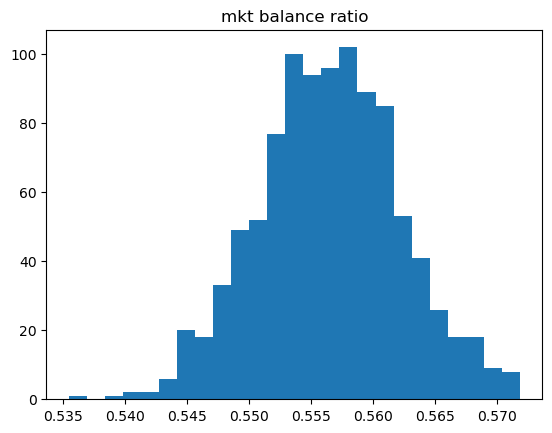

In [8]:
hist(res["stage_1_estimates"][valid_indices, k], bins = "auto")
title("mkt balance ratio");

In [9]:
rho_proportionate_sums = zeros(res["bootstrap_rounds"])
for i in valid_indices
    rho_proportionate_sums[i] = sum(res["stage_2_estimates"][i, 2K+1:3K])
end

In [10]:
# means and variances
for i in 1:k-1
    println("v_$(i+1)/v_$(i)")
    v_rel_estimates = res["stage_1_estimates"][valid_indices, i]
    println("    mean: ", mean(v_rel_estimates))
    println("     var: ", var(v_rel_estimates))
    println("  stddev: ", std(v_rel_estimates))
    println()
end
println()

# t: label for printouts
# i: index for iterating over the data

println("τ")
τ_estimates = res["stage_1_estimates"][valid_indices, k]
println("    mean: ", mean(τ_estimates))
println("     var: ", var(τ_estimates))
println("  stddev: ", std(τ_estimates))
println()

for (t, i) in enumerate(1:K)
    normals_estimate = []
    for j in valid_indices
        μ_estimate = res["stage_2_estimates"][j, i]
        σ_estimate = res["stage_2_estimates"][j, i+K]
        push!(normals_estimate, truncated(Normal(μ_estimate, σ_estimate), 0, 1))
    end
    
    println("mean(F_$t)")
    mean_estimates = [mean(normal_est) for normal_est in normals_estimate]
    println("    mean: ", mean(mean_estimates))
    println("     var: ", var(mean_estimates))
    println("  stddev: ", std(mean_estimates))
    println()

    println("stddev(F_$t)")
    stddev_estimates = [std(normal_est) for normal_est in normals_estimate]
    println("    mean: ", mean(stddev_estimates))
    println("     var: ", var(stddev_estimates))
    println("  stddev: ", std(stddev_estimates))
    println()
    println()
end

for (t, i) in enumerate(2K+1:3K)
    println("ρ_$t")
    rho_estimates = [res["stage_2_estimates"][j, i] / rho_proportionate_sums[j] for j in valid_indices]
    println("    mean: ", mean(rho_estimates))
    println("     var: ", var(rho_estimates))
    println("  stddev: ", std(rho_estimates))
    println()
end 

v_2/v_1
    mean: 0.513726062472945
     var: 0.0023243796629843286
  stddev: 0.048211820780637696

v_3/v_2
    mean: 0.5448891682766696
     var: 0.0009206344719613842
  stddev: 0.0303419589341457

v_4/v_3
    mean: 0.7356852961278929
     var: 0.001138375643559641
  stddev: 0.03373982281458575


τ
    mean: 0.5564596815359186
     var: 3.238662011692929e-5
  stddev: 0.0056909243640141

mean(F_1)
    mean: 0.6330710555233425
     var: 0.0035744693073035383
  stddev: 0.05978686567552725

stddev(F_1)
    mean: 0.2612887799762067
     var: 0.00039798697872357784
  stddev: 0.019949610991785726


mean(F_2)
    mean: 0.4919121368006957
     var: 0.005582922258774565
  stddev: 0.07471895515044737

stddev(F_2)
    mean: 0.1894556851978677
     var: 0.0002532800978008628
  stddev: 0.015914776083905888


mean(F_3)
    mean: 0.4442995606555141
     var: 0.0057758729156676195
  stddev: 0.07599916391426698

stddev(F_3)
    mean: 0.12619066299032755
     var: 8.870927167790979e-5
  stddev: 0.009418

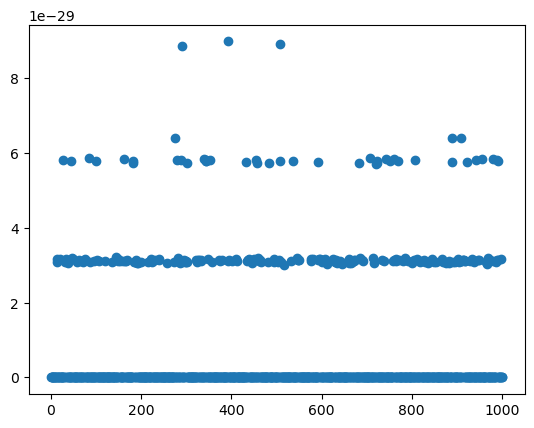

Python: <matplotlib.collections.PathCollection object at 0x0000024EA00DF610>

In [11]:
scatter(1:res["bootstrap_rounds"], res["stage_1_fitness"])

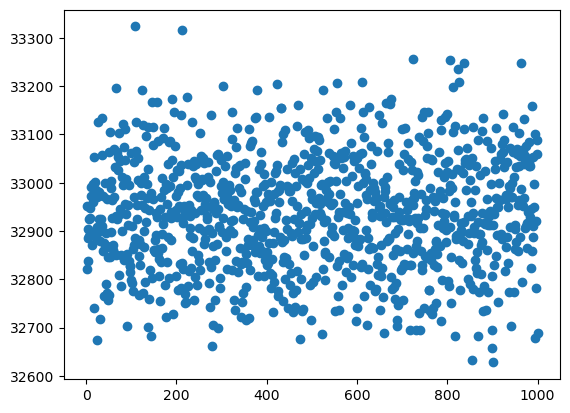

Python: <matplotlib.collections.PathCollection object at 0x0000024EA0751910>

In [12]:
scatter(1:res["bootstrap_rounds"], res["stage_2_fitness"])

### "True" parameters used to do the monte carlo simulations:

In [13]:
estimated_parameters = load("estimated_parameters_collapse_sinks_new.jld")
estimated_sol_2 = estimated_parameters["sol_2"]
estimated_v_rel = estimated_parameters["estimated_v_rel"]
estimated_α = estimated_parameters["estimated_α"]
estimated_τ = estimated_parameters["estimated_τ"]

estimated_v_rel

3-element Vector{Float64}:
 0.5122856729316837
 0.5444666789677739
 0.7343759862308326

In [14]:
estimated_τ

0.5566428717441424

In [15]:
for select_type in 1:K
    println("Type $(select_type):")
    println("  est. mean:   ", mean(truncated(Normal(estimated_sol_2[select_type], estimated_sol_2[select_type+K]), 0, 1)))
    println("  est. stddev: ", std(truncated(Normal(estimated_sol_2[select_type], estimated_sol_2[select_type+K]), 0, 1)))
    println()
end

ρ_vec = estimated_sol_2[2K+1:3K]
ρ = ρ_vec / sum(ρ_vec)

Type 1:
  est. mean:   0.6218731109376237
  est. stddev: 0.26941936271681677

Type 2:
  est. mean:   0.47925817202255716
  est. stddev: 0.1937007212849477

Type 3:
  est. mean:   0.4299514174743576
  est. stddev: 0.12872960530650412

Type 4:
  est. mean:   0.15008981318397652
  est. stddev: 0.14350323051369798

Type 5:
  est. mean:   0.3725486190702214
  est. stddev: 0.17831734889909354

Type 6:
  est. mean:   0.36481522548131606
  est. stddev: 0.2277440317418155

Type 7:
  est. mean:   0.1719001720496114
  est. stddev: 0.15910837225118346



7-element Vector{Float64}:
 0.03027193530118531
 0.07601773988328181
 0.12797581606169697
 0.10204321712725894
 0.09573962436979395
 0.08657973721246401
 0.48137193004431905